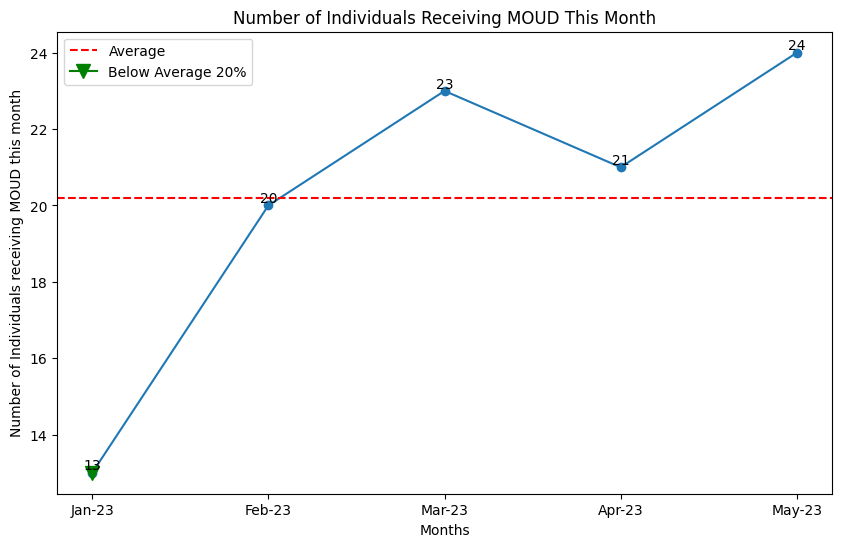

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel
df = pd.read_excel('your_file_path.xlsx', sheet_name='2023', header=0)

# Number of Individuals Receiving MOUD This Month
total_data = df.iloc[1, 1:6]  # Adjust the row and column range based on your data
months = ['Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23']  # Update with your desired month labels

# Calculate average
average = total_data.mean()

# Plotting Number of Individuals Receiving MOUD This Month (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(months, total_data, marker='o')

# Add data labels
for i, j in zip(months, total_data):
    plt.text(i, j, str(j), ha='center', va='bottom')

# Add average line
plt.axhline(y=average, color='r', linestyle='--', label='Average')

# Add blips for values deviating from the average by 20%
threshold = average * 0.2
for i, j in zip(months, total_data):
    if abs(j - average) > threshold:
        if j > average:
            plt.plot(i, j, marker='^', markersize=10, color='r', label='Above Average 20%')
        else:
            plt.plot(i, j, marker='v', markersize=10, color='g', label='Below Average 20%')

plt.xlabel('Months')
plt.ylabel('Number of Individuals receiving MOUD this month')
plt.title('Number of Individuals Receiving MOUD This Month')
plt.legend()
plt.show()


------------

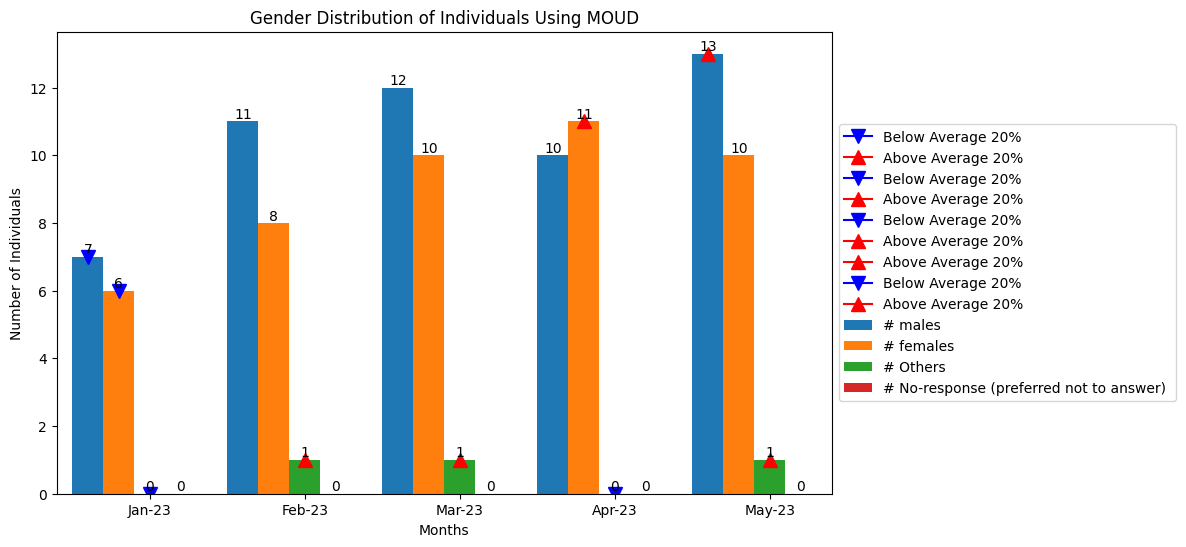

In [ ]:
#@title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data from Excel
df = pd.read_excel('your_file_path.xlsx', sheet_name='2023', header=0)

# Gender Distribution
gender_data = df.iloc[4:8, 1:6]  # Adjust the row and column range based on your data
gender_labels = df.iloc[4:8, 0].tolist()  # Extract the gender labels

# Define the month labels
months = ['Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23']  # Update with your desired month labels

# Calculate average by gender
gender_average = gender_data.mean(axis=1).values

# Plotting Gender Distribution (Grouped Bar Chart)
plt.figure(figsize=(10, 6))
bar_width = 0.2  # Adjust the width of each bar
index = np.arange(len(months))

bars = []
for i in range(len(gender_data)):
    bar = plt.bar(index + (i * bar_width), gender_data.iloc[i], bar_width, label=gender_labels[i])
    bars.append(bar)

# Add data labels
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

# Add average line
#average_line = np.repeat(gender_average[:, np.newaxis], len(months), axis=1)
#plt.plot(index, average_line.T, color='r', linestyle='--', label='Average')

# Add blips for values deviating from the average by 20%
threshold = gender_average * 0.2
for i in range(len(gender_data)):
    for j in range(len(months)):
        if abs(gender_data.iloc[i, j] - gender_average[i]) > threshold[i]:
            if gender_data.iloc[i, j] > gender_average[i]:
                plt.plot(index[j] + (i * bar_width), gender_data.iloc[i, j], marker='^', markersize=10, color='r',
                         label='Above Average 20%')
            else:
                plt.plot(index[j] + (i * bar_width), gender_data.iloc[i, j], marker='v', markersize=10, color='b',
                         label='Below Average 20%')

# Adjust x-axis limits to include all bars
plt.xlim(index[0] - bar_width, index[-1] + (len(gender_data) * bar_width))

plt.xlabel('Months')
plt.ylabel('Number of Individuals')
plt.title('Gender Distribution of Individuals Using MOUD')
# Move legend outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(index + (len(gender_data) * bar_width) / 2, months)  # Set x-axis tick positions and labels
plt.show()


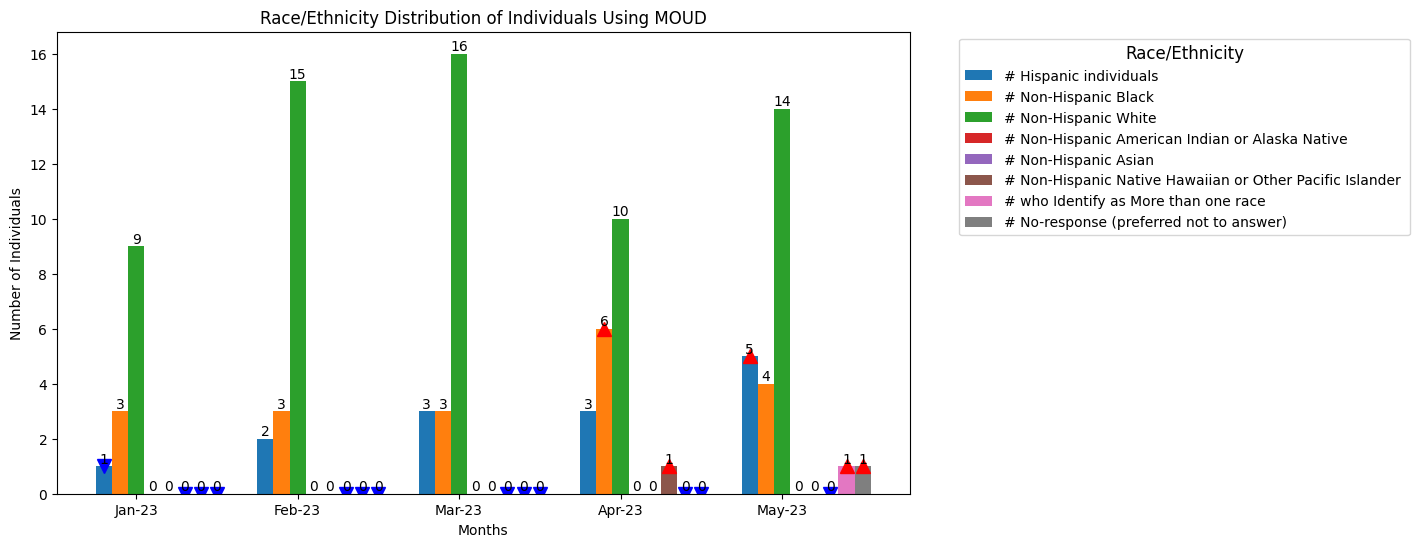

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel
df = pd.read_excel('your_file_path.xlsx', sheet_name='2023', header=0)

# Race/Ethnicity Distribution
race_data = df.iloc[9:17, 1:6]  # Adjust the row and column range based on your data
race_labels = df.iloc[9:17, 0].tolist()  # Extract the race/ethnicity labels

# Calculate average for each race/ethnicity group
race_avg = race_data.mean(axis=1).reset_index(drop=True)

# Define x-axis tick positions and labels
months = ['Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23']  # Update with your desired month labels
index = list(range(len(race_data.columns)))

# Plotting Race/Ethnicity Distribution (Grouped Bar Chart)
plt.figure(figsize=(11, 6))
bar_width = 0.1

bars = []
for i in range(len(race_data)):
    bar = plt.bar([x + (i * bar_width) for x in index], race_data.iloc[i], bar_width, label=race_labels[i])
    bars.append(bar)

    # Add data labels
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

    # Add blip to indicate values above or below average by 40%
    avg = race_avg[i]
    for rect in bar:
        height = rect.get_height()
        if height > avg + (avg * 0.4):
            plt.plot(rect.get_x() + rect.get_width() / 2, height, marker='^', markersize=10, color='r')
        elif height < avg - (avg * 0.4):
            plt.plot(rect.get_x() + rect.get_width() / 2, height, marker='v', markersize=10, color='b')

plt.xlabel('Months')
plt.ylabel('Number of Individuals')
plt.title('Race/Ethnicity Distribution of Individuals Using MOUD')

# Set x-axis tick positions and labels
plt.xticks([x + bar_width * ((len(race_data.columns) - 1) / 2) for x in index], months)

# Set legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Race/Ethnicity', title_fontsize='12')

plt.show()


--------------

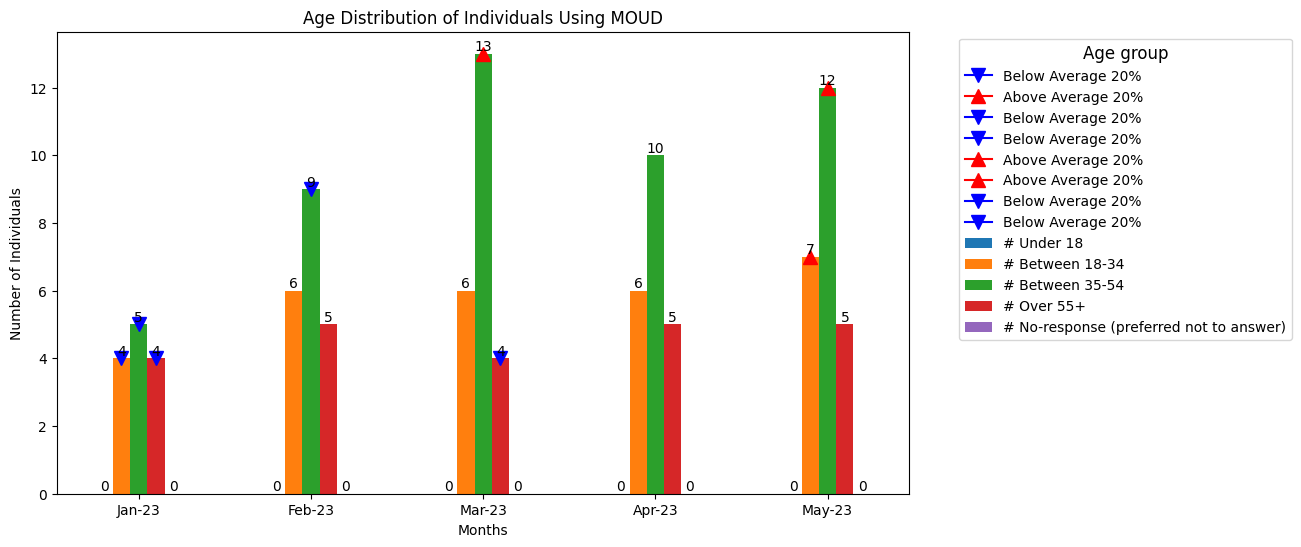

In [ ]:
#@title
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel
df = pd.read_excel('your_file_path.xlsx', sheet_name='2023', header=0)

# Race/Ethnicity Distribution
race_data = df.iloc[18:23, 1:6]  # Adjust the row and column range based on your data
race_labels = df.iloc[18:23, 0].tolist()  # Extract the race/ethnicity labels

# Calculate average for each race/ethnicity
race_avg = race_data.mean(axis=1).tolist()  # Convert to a list

# Define x-axis tick positions and labels
months = ['Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23']  # Update with your desired month labels
index = list(range(len(race_data.columns)))

# Plotting Race/Ethnicity Distribution (Grouped Bar Chart)
plt.figure(figsize=(11, 6))
bar_width = 0.1

bars = []
for i in range(len(race_data)):
    bar = plt.bar([x + (i * bar_width) for x in index], race_data.iloc[i], bar_width, label=race_labels[i])
    bars.append(bar)

    # Add data labels
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

    # Add blip for values more or less than average by 20%
    for j, rect in enumerate(bar):
        value = rect.get_height()
        avg = race_avg[i]  # Access the individual average value
        threshold = avg * 1.2  # 20% above the average
        if value > threshold:
            plt.plot(rect.get_x() + rect.get_width() / 2, value, marker='^', markersize=10, color='r',
                     label='Above Average 20%')
        elif value < avg:
            plt.plot(rect.get_x() + rect.get_width() / 2, value, marker='v', markersize=10, color='b',
                     label='Below Average 20%')

plt.xlabel('Months')
plt.ylabel('Number of Individuals')
plt.title('Age Distribution of Individuals Using MOUD')

# Set x-axis tick positions and labels
plt.xticks([x + bar_width * ((len(race_data.columns) - 1) / 2) for x in index], months)

# Set legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Age group', title_fontsize='12')

plt.show()
